In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv').copy()
test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv').copy()

In [103]:
train.shape

(15120, 56)

In [104]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [105]:
train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [106]:
train.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [107]:
train=train.drop(['Id'],axis=1)

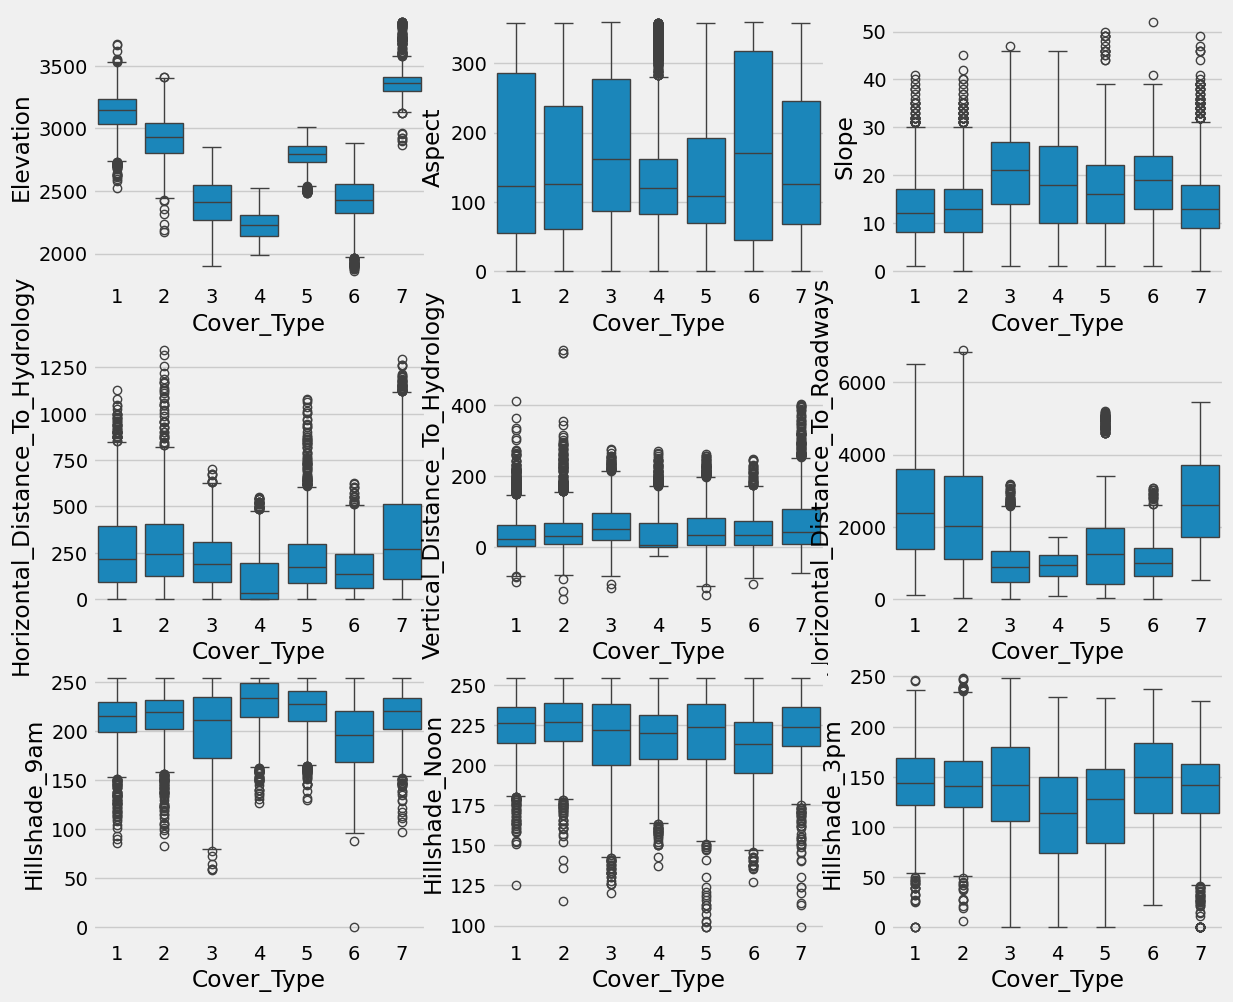

In [108]:

for i,col in enumerate(train.iloc[:,:9].columns):
    ax=plt.subplot(3,3,i+1)
    sns.boxplot(x='Cover_Type',y=col,data=train,ax=ax)
plt.subplots_adjust(top = 1)
plt.gcf().set_size_inches(13,10)

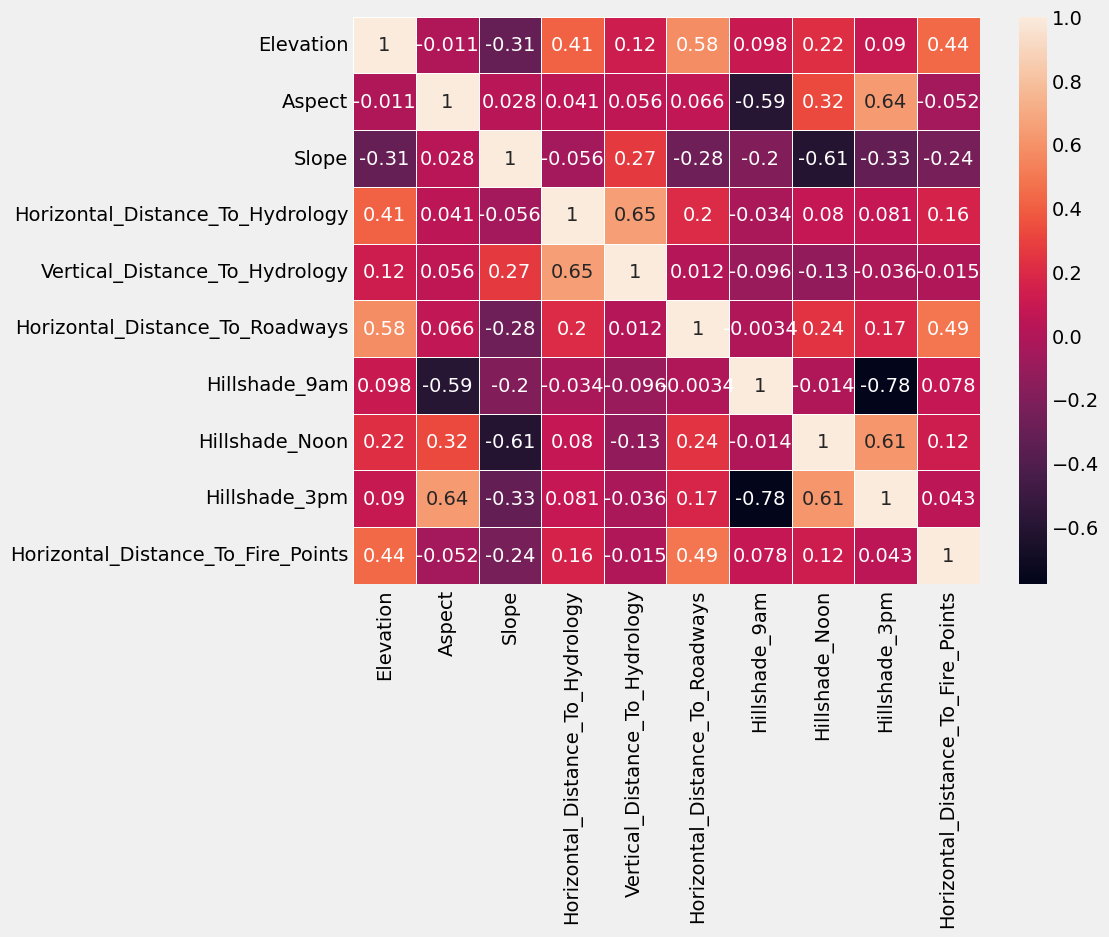

In [109]:
plt.figure(figsize=(9,7))
sns.heatmap(train.iloc[:,:10].corr(),annot=True,linewidths=.5)
plt.show()


.0-.19 very weak     
.2-.39 - weak            
.4-.59 - moderate        
.6-.79 - strong           
.8-1 - very strong         


### Principle component analysis

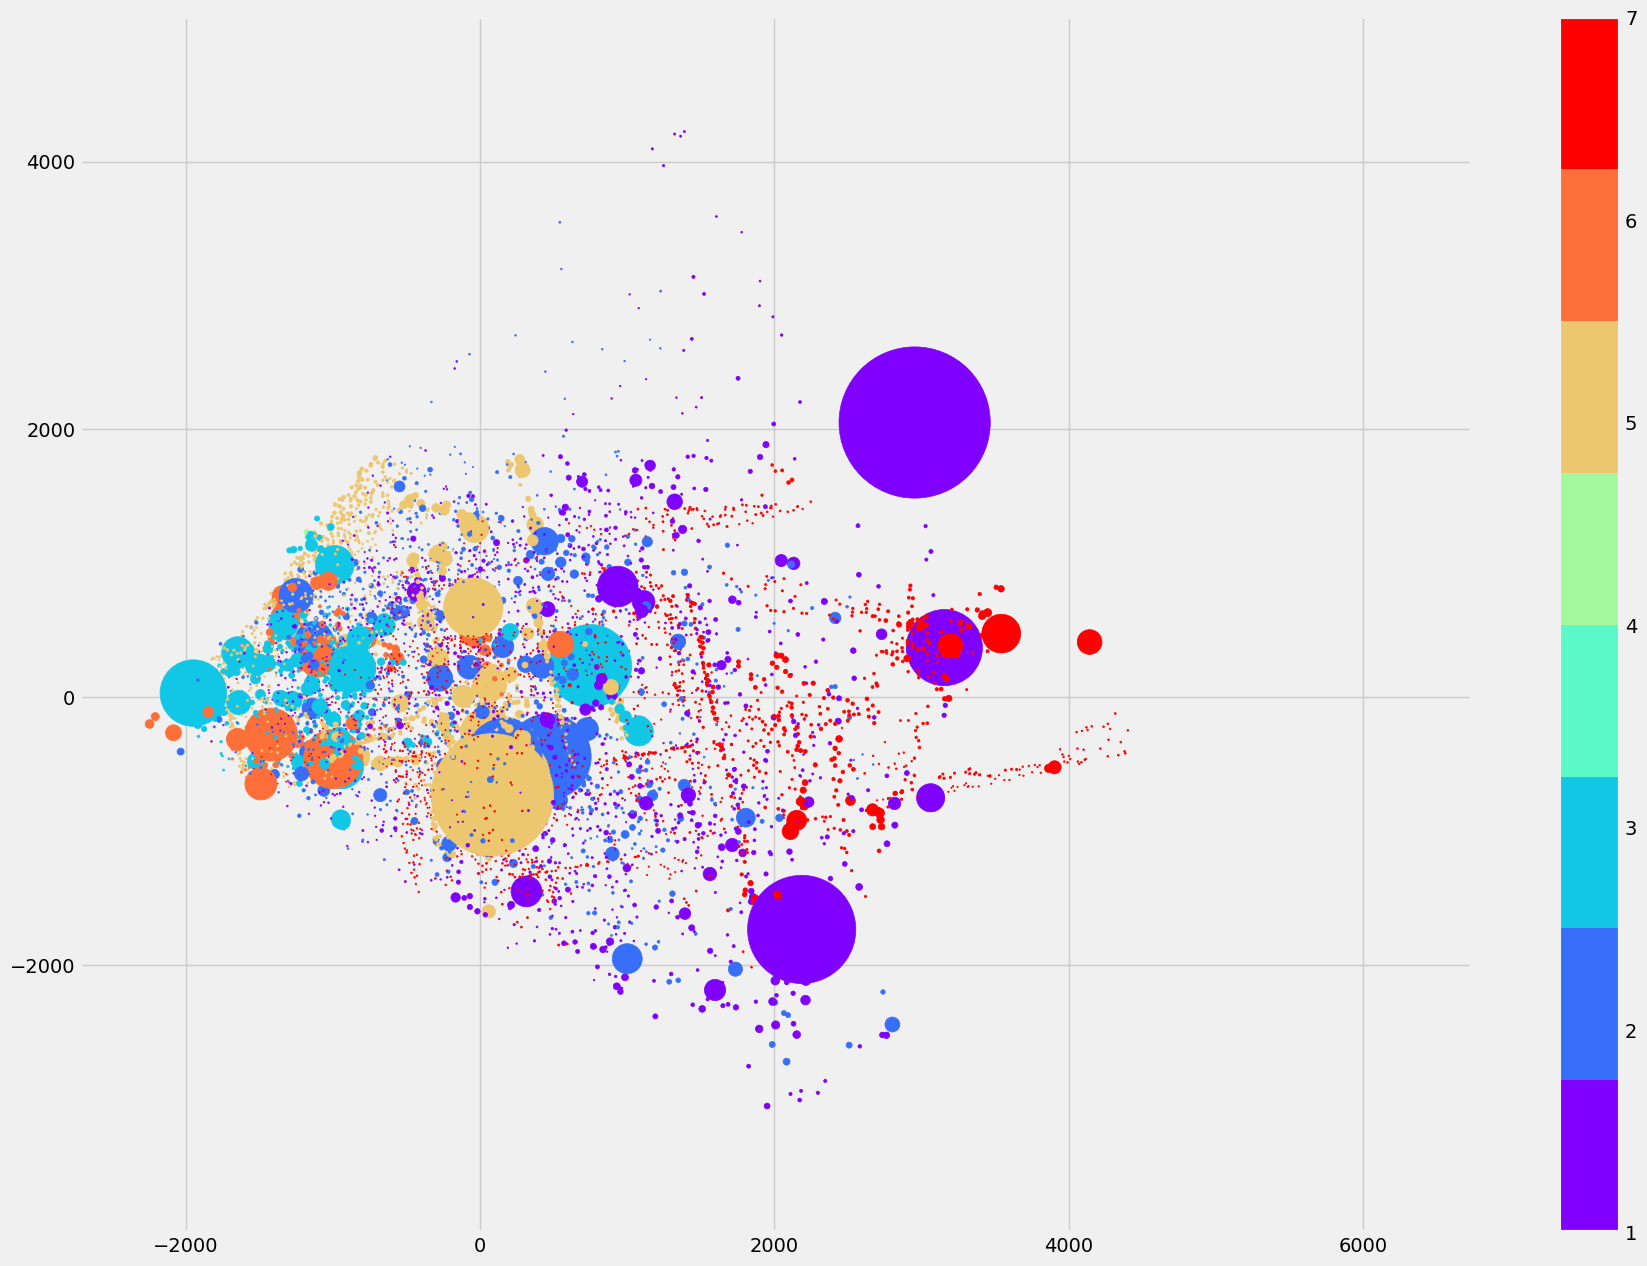

In [110]:
pca=PCA(n_components=3)
pca_results=pca.fit_transform(train.drop('Cover_Type',axis=1))
tp, ax = plt.subplots(figsize=(20,15))
temp = ax.scatter(pca_results[:,0], pca_results[:,1], c=train.Cover_Type,s=700/pca_results[:,2] ,cmap=plt.cm.get_cmap('rainbow', 8))
tp.colorbar(temp)
plt.show()

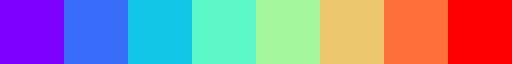

In [111]:
plt.cm.get_cmap('rainbow', 8)

In [112]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(10,7))

#pca_results=pca.fit_transform(train.iloc[:,:9])
ax=Axes3D(fig)
ax.scatter(pca_results[:,0],pca_results[:,1],pca_results[:,2],cmap=plt.cm.get_cmap('rainbow', 8),c=train.Cover_Type)


<Figure size 1000x700 with 0 Axes>

### First model

In [113]:
X_train,X_test,y_train,y_test=train_test_split(train.drop('Cover_Type',axis=1),train['Cover_Type'])

#### Random forest

In [114]:
rf=RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)
y_pre=rf.predict(X_test)
acc=metrics.accuracy_score(y_test,y_pre)
cv=cross_val_score(rf,train.drop('Cover_Type',axis=1),train['Cover_Type'],cv=5)
print("Mean cross validation score = ",cv.mean())
print('accuracy is ',acc)
print(metrics.classification_report(y_test,y_pre))

Mean cross validation score =  0.7822751322751322
accuracy is  0.8396825396825397
              precision    recall  f1-score   support

           1       0.77      0.75      0.76       543
           2       0.78      0.66      0.72       569
           3       0.80      0.78      0.79       546
           4       0.92      0.96      0.94       518
           5       0.90      0.93      0.92       560
           6       0.78      0.84      0.81       543
           7       0.91      0.97      0.94       501

    accuracy                           0.84      3780
   macro avg       0.84      0.84      0.84      3780
weighted avg       0.84      0.84      0.84      3780



In [115]:
#Record
accrf1=acc
acccv1=cv.mean()

In [116]:
y_train.value_counts()/len(y_train)*100-pd.Series(y_pre).value_counts()/len(y_pre)*100

1    0.185185
2    1.305115
3    0.105820
4    0.194004
5   -1.155203
6   -1.137566
7    0.502646
dtype: float64

####  Gradient Boosting

In [117]:
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
ypre=gb.predict(X_test)
acc=metrics.accuracy_score(y_test,ypre)
cv=cross_val_score(gb,train.drop('Cover_Type',axis=1),train['Cover_Type'],cv=5)
print("cross val score is ",cv.mean())
print('accuracy = ',acc)

cross val score is  0.7240079365079366
accuracy =  0.7804232804232805


In [118]:
#Record
accrf2=acc
acccv2=cv.mean()

In [119]:
y_train.value_counts()/len(y_train)*100-pd.Series(ypre).value_counts()/len(ypre)*100

1    0.502646
2    2.178131
3    0.105820
4   -0.070547
5   -1.763668
6   -0.873016
7   -0.079365
dtype: float64

In [120]:
print(metrics.classification_report(y_test,ypre))

              precision    recall  f1-score   support

           1       0.72      0.69      0.71       543
           2       0.72      0.57      0.63       569
           3       0.72      0.70      0.71       546
           4       0.89      0.95      0.92       518
           5       0.82      0.88      0.85       560
           6       0.71      0.74      0.72       543
           7       0.86      0.96      0.91       501

    accuracy                           0.78      3780
   macro avg       0.78      0.78      0.78      3780
weighted avg       0.78      0.78      0.78      3780



## Improving our model.

#####  Feature engineering

In [121]:
train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [122]:


# train.head()
train['HorizontalHydrology_HorizontalFire'] = (train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Fire_Points'])
train['Neg_HorizontalHydrology_HorizontalFire'] = (train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Fire_Points'])
train['HorizontalHydrology_HorizontalRoadways'] = (train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Roadways'])
train['Neg_HorizontalHydrology_HorizontalRoadways'] = (train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Roadways'])
train['HorizontalFire_Points_HorizontalRoadways'] = (train['Horizontal_Distance_To_Fire_Points']+train['Horizontal_Distance_To_Roadways'])
train['Neg_HorizontalFire_Points_HorizontalRoadways'] = (train['Horizontal_Distance_To_Fire_Points']-train['Horizontal_Distance_To_Roadways'])

train['Neg_Elevation_Vertical'] = train['Elevation']-train['Vertical_Distance_To_Hydrology']
train['Elevation_Vertical'] = train['Elevation']+train['Vertical_Distance_To_Hydrology']

train['mean_hillshade'] =  (train['Hillshade_9am']  + train['Hillshade_Noon'] + train['Hillshade_3pm'] ) / 3

train['Mean_HorizontalHydrology_HorizontalFire'] = (train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Fire_Points'])/2
train['Mean_HorizontalHydrology_HorizontalRoadways'] = (train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Roadways'])/2
train['Mean_HorizontalFire_Points_HorizontalRoadways'] = (train['Horizontal_Distance_To_Fire_Points']+train['Horizontal_Distance_To_Roadways'])/2

train['MeanNeg_Mean_HorizontalHydrology_HorizontalFire'] = (train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Fire_Points'])/2
train['MeanNeg_HorizontalHydrology_HorizontalRoadways'] = (train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Roadways'])/2
train['MeanNeg_HorizontalFire_Points_HorizontalRoadways'] = (train['Horizontal_Distance_To_Fire_Points']-train['Horizontal_Distance_To_Roadways'])/2

train['Slope2'] = np.sqrt(train['Horizontal_Distance_To_Hydrology']**2+train['Vertical_Distance_To_Hydrology']**2)
train['Mean_Fire_Hydrology_Roadways']=(train['Horizontal_Distance_To_Fire_Points'] + train['Horizontal_Distance_To_Hydrology'] + train['Horizontal_Distance_To_Roadways']) / 3
train['Mean_Fire_Hyd']=(train['Horizontal_Distance_To_Fire_Points'] + train['Horizontal_Distance_To_Hydrology']) / 2

train["Vertical_Distance_To_Hydrology"] = abs(train['Vertical_Distance_To_Hydrology'])

train['Neg_EHDtH'] = train.Elevation-train.Horizontal_Distance_To_Hydrology*0.2


####  Minmax scaling

In [123]:
scaler=MinMaxScaler()
scaler.fit(train.drop('Cover_Type',axis=1))
scaled_train=scaler.transform(train.drop('Cover_Type',axis=1))

In [124]:
X_train,X_test,y_train,y_test=train_test_split(scaled_train,train['Cover_Type'])
rf=RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)
y_pre=rf.predict(X_test)
acc=metrics.accuracy_score(y_test,y_pre)
cv=cross_val_score(rf,train.drop('Cover_Type',axis=1),train['Cover_Type'],cv=5)
print("Mean cross validation score = ",cv.mean())
print('accuracy is ',acc)

Mean cross validation score =  0.8122354497354497
accuracy is  0.8886243386243386


In [125]:
#Record
accrf3=acc
acccv3=cv.mean()

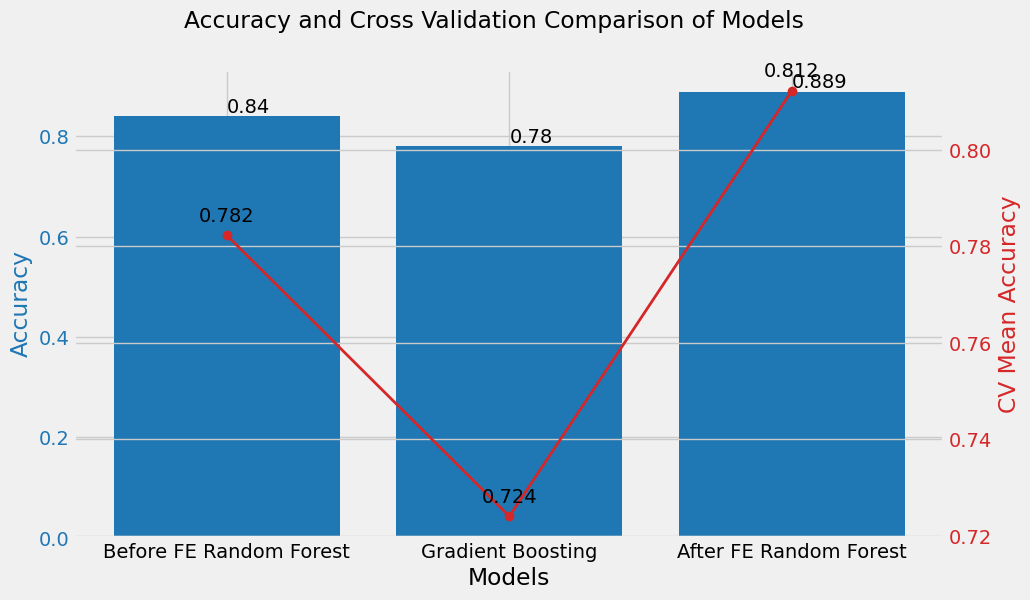

In [130]:
import matplotlib.pyplot as plt

models = ['Before FE Random Forest', 'Gradient Boosting', 'After FE Random Forest']

accuracies = [accrf1, accrf2, accrf3]

cv_means = [acccv1, acccv2, acccv3]

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot accuracies
color = 'tab:blue'
ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy', color=color)
bars1 = ax1.bar(models, accuracies, color=color)
ax1.tick_params(axis='y', labelcolor=color)

for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), va='bottom')

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('CV Mean Accuracy', color=color)
bars2 = ax2.plot(models, cv_means, color=color, marker='o', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

for i, txt in enumerate(cv_means):
    ax2.annotate(round(txt, 3), (models[i], cv_means[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.subplots_adjust(top=0.85)
plt.suptitle('Accuracy and Cross Validation Comparison of Models', y=0.95)
plt.show()


using minmax scaling has very slightly improved our model.

#### Feature importances

<Axes: ylabel='None'>

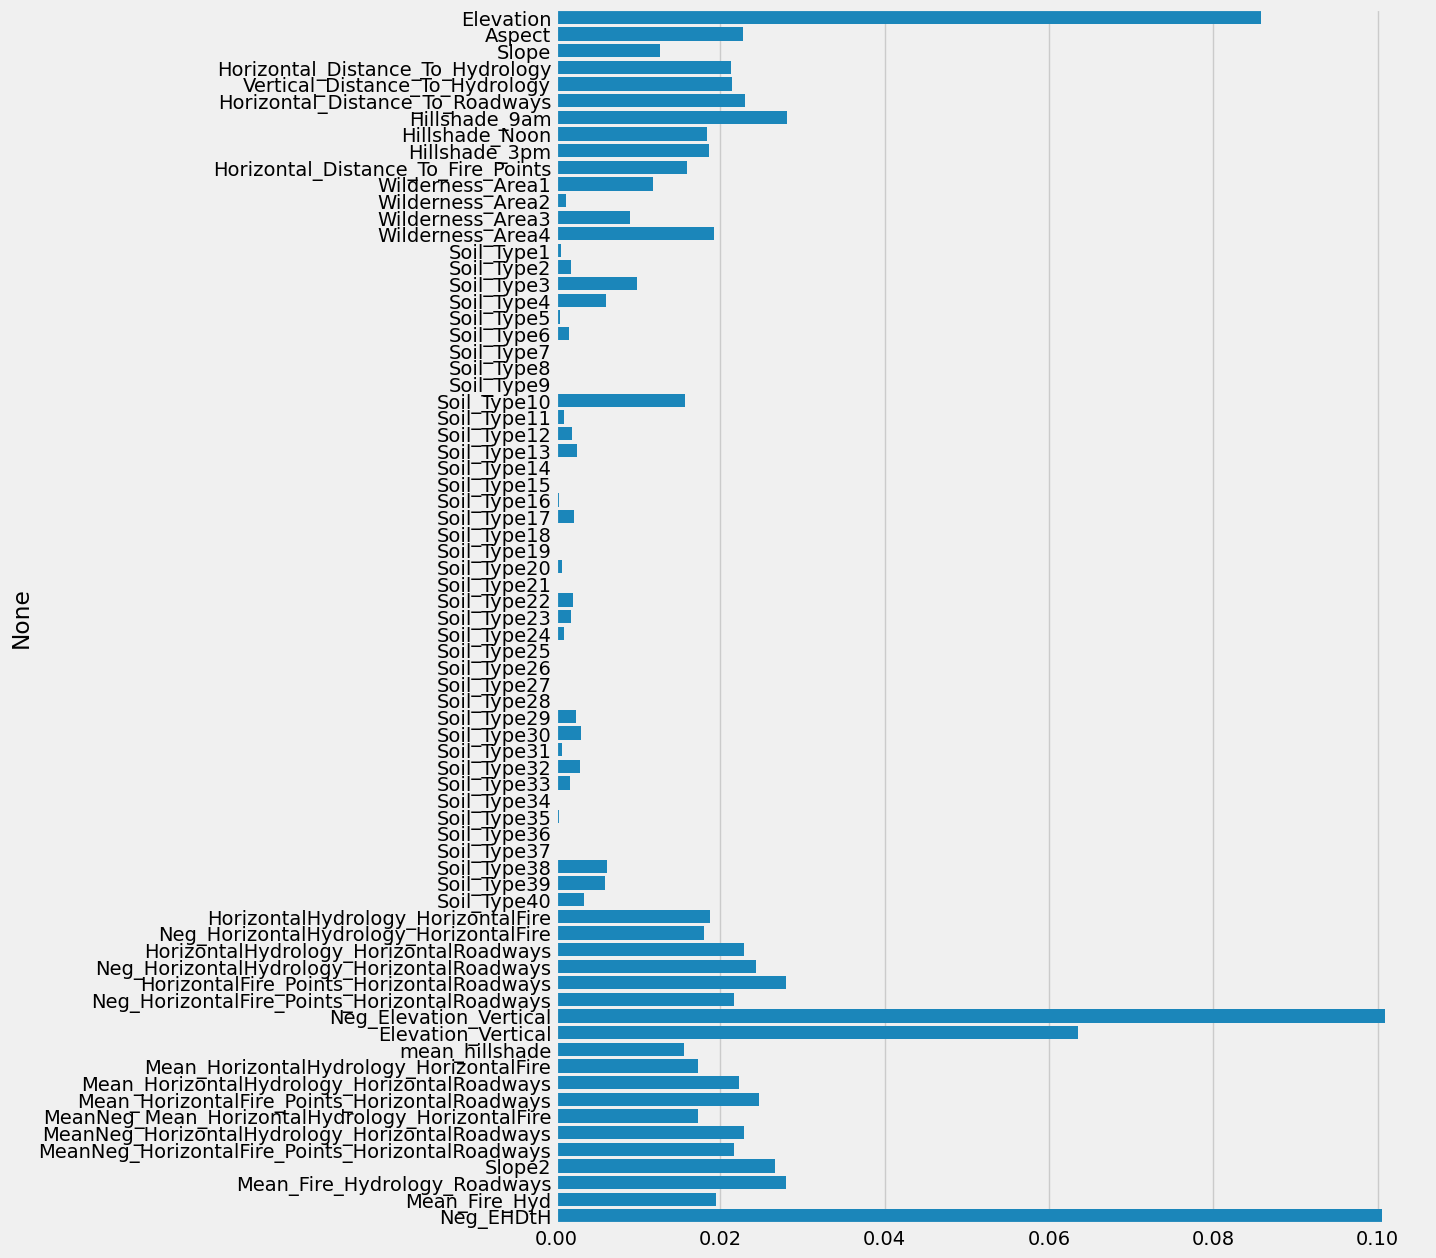

In [127]:
plt.figure(figsize=(10,15))
sns.barplot(y=train.drop('Cover_Type',axis=1).columns,x=rf.feature_importances_)

####   Tuning our model

In [128]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 8,endpoint=False)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(20, 100, num = 8)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [100, 112, 125, 137, 150, 162, 175, 187], 'max_features': ['auto', 'sqrt'], 'max_depth': [20, 31, 42, 54, 65, 77, 88, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [131]:
rf1=RandomForestClassifier()
rf1_rand=RandomizedSearchCV(rf1,param_distributions=random_grid,n_iter=100,cv=3,n_jobs=-1)
rf1_rand.fit(X_train,y_train)
print(rf1_rand.best_params_)

{'n_estimators': 162, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 65, 'bootstrap': False}


In [132]:
accuracy=metrics.make_scorer(metrics.accuracy_score)

In [133]:
params={'bootstrap': [True,False], 'max_features': ['sqrt','auto'], 'min_samples_leaf': [1,2], 'min_samples_split': [4,6], 'n_estimators':
       [190,200],
        'max_depth': [20,30,40]}


In [134]:
gcv=GridSearchCV(RandomForestClassifier(),param_grid=params,scoring=accuracy,n_jobs=1,cv=5)
gcv.fit(X_train,y_train)
gcv.best_score_

0.8843915343915345

In [135]:
gcv.best_params_

{'bootstrap': False,
 'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 200}

### Final model

In [166]:
rf=RandomForestClassifier(bootstrap=False,
 max_depth= 30,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 3,
 n_estimators= 550,
 criterion='gini')

rf.fit(X_train,y_train)
y_pre=rf.predict(X_test)
cv=cross_val_score(rf,X_test,y_test,cv=5)
print('accuracy score is ',metrics.accuracy_score(y_test,y_pre))
print('cv score is',cv.mean())

accuracy score is  0.9015873015873016
cv score is 0.8447089947089947


In [167]:
#Record
accrf4=metrics.accuracy_score(y_test,y_pre)
acccv4=cv.mean()

In [137]:
rf.score(X_train,y_train)

1.0

In [162]:
ex=ExtraTreesClassifier(n_estimators=950,random_state=0,max_features='sqrt',min_samples_split=3)
ex.fit(X_train,y_train)
y_pre=ex.predict(X_test)
cv=cross_val_score(ex,X_test,y_test,cv=5)
print('accuracy score is ',metrics.accuracy_score(y_test,y_pre))
print('cv score is',cv.mean())

accuracy score is  0.9068783068783068
cv score is 0.8436507936507937


In [163]:
#Record
accrf5=metrics.accuracy_score(y_test,y_pre)
acccv5=cv.mean()
acccv5

0.8436507936507937

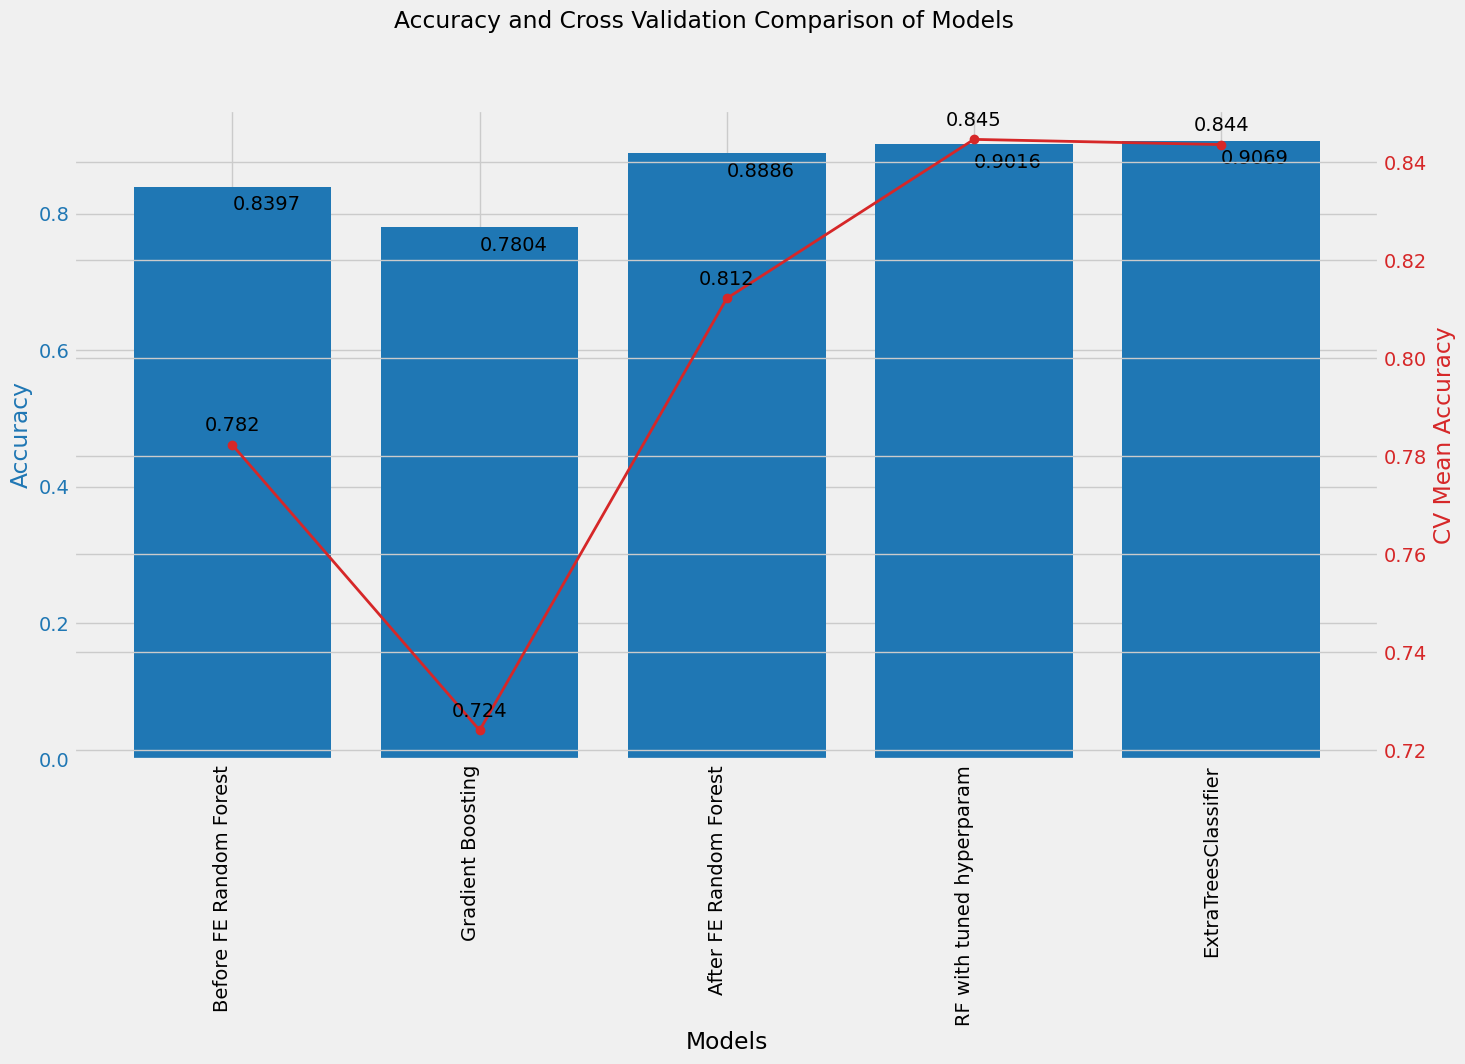

In [171]:
models = ['Before FE Random Forest', 'Gradient Boosting', 'After FE Random Forest','RF with tuned hyperparam','ExtraTreesClassifier']

accuracies = [accrf1, accrf2, accrf3, accrf4, accrf5]

cv_means = [acccv1, acccv2, acccv3, acccv4, acccv5]

fig, ax1 = plt.subplots(figsize=(15, 10))

# Plot accuracies
color = 'tab:blue'
ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy', color=color)
bars1 = ax1.bar(models, accuracies, color=color)
ax1.tick_params(axis='y', labelcolor=color)

for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval-0.04, round(yval, 4), va='bottom')

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('CV Mean Accuracy', color=color)
bars2 = ax2.plot(models, cv_means, color=color, marker='o', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

for i, txt in enumerate(cv_means):
    ax2.annotate(round(txt, 3), (models[i], cv_means[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90, ha="right")
plt.subplots_adjust(bottom=0.2,top=0.85)
plt.suptitle('Accuracy and Cross Validation Comparison of Models', y=0.95)
plt.show()

In [141]:
ex.score(X_train,y_train)

1.0

In [142]:
ex.score(X_test,y_test)

0.9068783068783068

In [143]:


# test.head()
test['HorizontalHydrology_HorizontalFire'] = (test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Fire_Points'])
test['Neg_HorizontalHydrology_HorizontalFire'] = (test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Fire_Points'])
test['HorizontalHydrology_HorizontalRoadways'] = (test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Roadways'])
test['Neg_HorizontalHydrology_HorizontalRoadways'] = (test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Roadways'])
test['HorizontalFire_Points_HorizontalRoadways'] = (test['Horizontal_Distance_To_Fire_Points']+test['Horizontal_Distance_To_Roadways'])
test['Neg_HorizontalFire_Points_HorizontalRoadways'] = (test['Horizontal_Distance_To_Fire_Points']-test['Horizontal_Distance_To_Roadways'])

test['Neg_Elevation_Vertical'] = test['Elevation']-test['Vertical_Distance_To_Hydrology']
test['Elevation_Vertical'] = test['Elevation']+test['Vertical_Distance_To_Hydrology']

test['mean_hillshade'] =  (test['Hillshade_9am']  + test['Hillshade_Noon'] + test['Hillshade_3pm'] ) / 3

test['Mean_HorizontalHydrology_HorizontalFire'] = (test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Fire_Points'])/2
test['Mean_HorizontalHydrology_HorizontalRoadways'] = (test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Roadways'])/2
test['Mean_HorizontalFire_Points_HorizontalRoadways'] = (test['Horizontal_Distance_To_Fire_Points']+test['Horizontal_Distance_To_Roadways'])/2

test['MeanNeg_Mean_HorizontalHydrology_HorizontalFire'] = (test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Fire_Points'])/2
test['MeanNeg_HorizontalHydrology_HorizontalRoadways'] = (test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Roadways'])/2
test['MeanNeg_HorizontalFire_Points_HorizontalRoadways'] = (test['Horizontal_Distance_To_Fire_Points']-test['Horizontal_Distance_To_Roadways'])/2

test['Slope2'] = np.sqrt(test['Horizontal_Distance_To_Hydrology']**2+test['Vertical_Distance_To_Hydrology']**2)
test['Mean_Fire_Hydrology_Roadways']=(test['Horizontal_Distance_To_Fire_Points'] + test['Horizontal_Distance_To_Hydrology'] + test['Horizontal_Distance_To_Roadways']) / 3
test['Mean_Fire_Hyd']=(test['Horizontal_Distance_To_Fire_Points'] + test['Horizontal_Distance_To_Hydrology']) / 2

test["Vertical_Distance_To_Hydrology"] = abs(test['Vertical_Distance_To_Hydrology'])

test['Neg_EHDtH'] = test.Elevation-test.Horizontal_Distance_To_Hydrology*0.2


In [144]:
scaler.fit(test.drop('Id',axis=1))
scaled=scaler.fit_transform(test.drop('Id',axis=1))


In [145]:
y_pre=rf.predict(scaled)

### Support vector machine

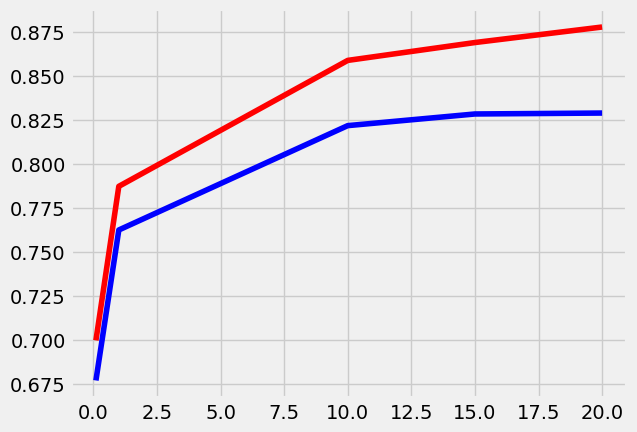

In [146]:
train_acc=[]
test_acc=[]
for this_c in [.1,1,10,15,20]:
        clf = SVC(kernel = 'rbf', gamma = .5 ,C = this_c).fit(X_train, y_train)
        train_acc.append(clf.score(X_train,y_train))
        test_acc.append(clf.score(X_test,y_test))


c=[.1,1,10,15,20]
plt.figure()
plt.plot(c,train_acc,color='r')
plt.plot(c,test_acc,color='b')

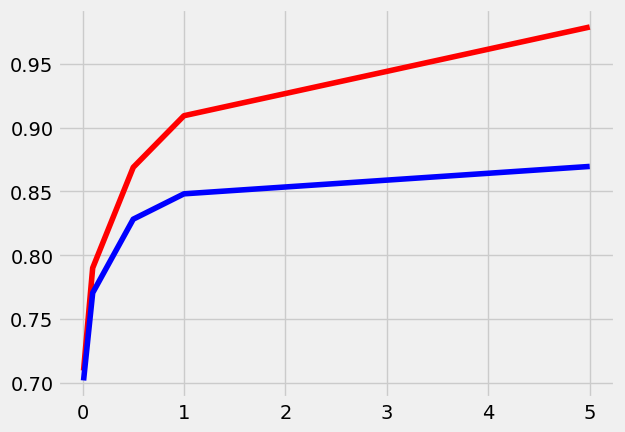

In [147]:
train_acc=[]
test_acc=[]
for this_g in [.01,.1,.5,1,5]:
        clf = SVC(kernel = 'rbf', gamma = this_g ,C =15 ).fit(X_train, y_train)
        train_acc.append(clf.score(X_train,y_train))
        test_acc.append(clf.score(X_test,y_test))


g=[.01,.1,.5,1,5]
plt.figure()
plt.plot(g,train_acc,color='r')
plt.plot(g,test_acc,color='b')

#### Final svc

In [148]:
clf=SVC(kernel='rbf',C=10,gamma=7).fit(X_train,y_train)
print('train set accuracy',clf.score(X_train,y_train))
print('test set accuracy',clf.score(X_test,y_test))

train set accuracy 0.9835978835978836
test set accuracy 0.8695767195767196


In [ ]:
cross_val_score(clf,X_test,y_test,cv=5).mean()

### Voting classifier

In [149]:
vclf=VotingClassifier(estimators=[('svm',clf),('extra',ex),('rf',rf)],voting='hard')
vclf.fit(X_train,y_train)
print('test set accuracy',vclf.score(X_test,y_test))


test set accuracy 0.906084656084656


In [177]:
acccv6=vclf.score(X_test,y_test)

In [ ]:
vclf.predict(scaled)

In [ ]:
cross_val_score(vclf,X_test,y_test,cv=5).mean()

In [172]:
import matplotlib.pyplot as plt

mean_cv_score_vclf = cross_val_score(vclf,X_test,y_test,cv=5).mean()
mean_cv_score_clf = cross_val_score(clf,X_test,y_test,cv=5).mean()


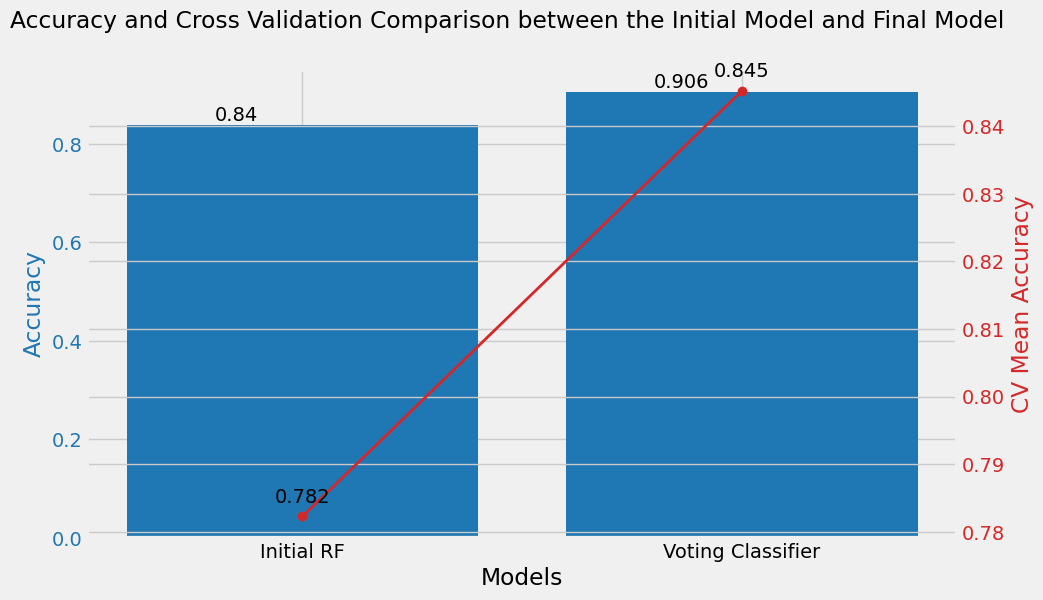

In [186]:

models = ['Initial RF','Voting Classifier']

accuracies = [accrf1, acccv6]
cv_means = [acccv1, mean_cv_score_vclf]

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot accuracies
color = 'tab:blue'
ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy', color=color)
bars1 = ax1.bar(models, accuracies, color=color)
ax1.tick_params(axis='y', labelcolor=color)

for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/4, yval, round(yval, 3), va='bottom')

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('CV Mean Accuracy', color=color)
bars2 = ax2.plot(models, cv_means, color=color, marker='o', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

for i, txt in enumerate(cv_means):
    ax2.annotate(round(txt, 3), (models[i], cv_means[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.subplots_adjust(top=0.85)
plt.suptitle('Accuracy and Cross Validation Comparison between the Initial Model and Final Model', y=0.95)
plt.show()